In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_final_set_country.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,country,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR
0,2020-01-22,Afghanistan,0,0.0,NaN,NaN
120,2020-01-22,Kuwait,0,0.0,NaN,NaN
121,2020-01-22,Algeria,0,0.0,NaN,NaN
122,2020-01-22,Andorra,0,0.0,NaN,NaN
123,2020-01-22,Angola,0,0.0,NaN,NaN


In [3]:
len(df_analyse["country"].unique())

188

In [4]:
df_analyse.tail()

,date,country,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR
44363,2020-09-13,Gambia,3405,3407.2,157.255814,125.192593
44364,2020-09-13,Georgia,2227,2195.0,13.374194,18.037294
44365,2020-09-13,Germany,261737,262029.4,260.502498,196.370744
44366,2020-09-13,Estonia,2676,2677.0,120.651515,111.953586
44367,2020-09-13,Zimbabwe,7526,7528.8,319.333333,301.361446


In [5]:
np.array(df_analyse[df_analyse["country"]=="Nepal"]["confirmed"])



array([    0,     0,     0,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     2,     2,
           3,     3,     4,     5,     5,     5,     5,     5,     6,
           6,     9,     9,     9,     9,     9,     9,     9,     9,
          12,    14,    16,    16,    16,    30,    31,    31,    31,
          43,    45,    48,    49,    49,    52,    52,    54,    57,
          57,    59,    59,    75,    75,    82,    99,   101,   102,
         110,   110,   134,   217,   250,   249,   267,   291,   295,
         375,   402,   427,   457,   516,   584,   603,   682,   772,
         886,  1042,

In [6]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate



In [7]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


In [8]:
countries=df_analyse["country"].unique()
countries[:10]

array(['Afghanistan', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway'],
      dtype=object)

In [9]:
for country in countries:
    print(np.array(df_analyse[df_analyse["country"]==country]["confirmed"])[100])
    break

2335


In [10]:
propagation_rates_countries={}
for country in countries:
    # condition I0+S0+R0=N0
    I0=np.array(df_analyse[df_analyse["country"]==country]["confirmed"])[35]
    S0=N0-I0
    R0=0

    SIR=np.array([S0,I0,R0])
    propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                            'infected':I0,
                                            'recovered':R0})



    for each_t in np.arange(100):

        new_delta_vec=SIR_model(SIR,beta,gamma)

        SIR=SIR+new_delta_vec

        propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                    'infected':SIR[1],
                                                    'recovered':SIR[2]}, ignore_index=True)
    propagation_rates_countries[country]=propagation_rates
    
    

In [11]:
propagation_rates_countries['Italy']

,susceptible,infected,recovered
0,999365.882084,588.817916,45.300000
1,999130.504269,765.313939,104.181792
2,998824.644868,994.641946,180.713186
3,998427.255713,1292.566907,280.177380
4,997911.042101,1679.523828,409.434071
5,997240.635951,2181.977595,577.386454
6,996370.253261,2834.162525,795.584213
7,995240.703168,3680.296366,1079.000466
8,993775.590871,4777.379027,1447.030102
9,991876.533805,6198.698190,1924.768005


In [12]:
def simulate_SIR(propagation_rates):
    
    fig, ax1 = plt.subplots(1, 1)

    ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
    ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
    ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

    ax1.set_ylim(10, 1000000)
    ax1.set_yscale('linear')
    ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
    ax1.set_xlabel('time in days',size=16)
    ax1.legend(loc='best',
               prop={'size': 16});

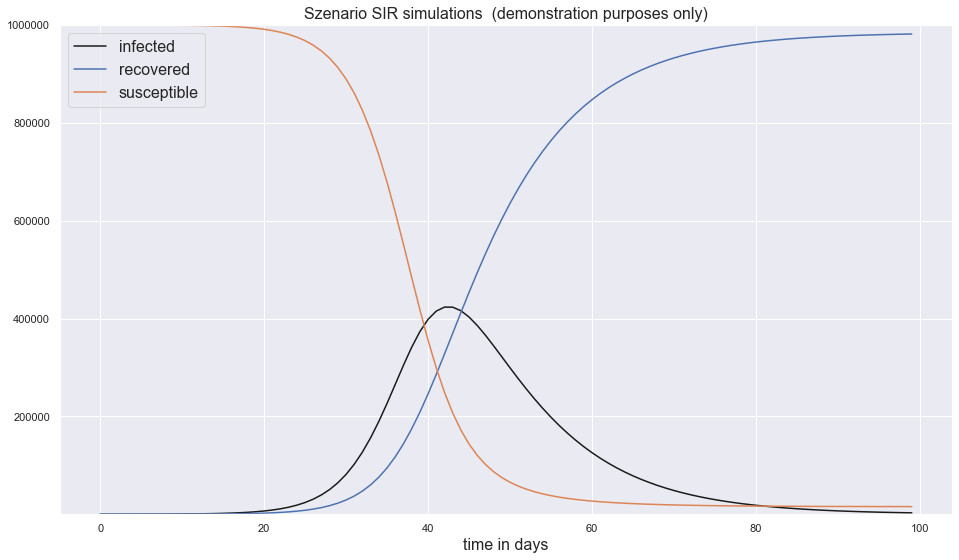

In [13]:
simulate_SIR(propagation_rates_countries['Germany'])

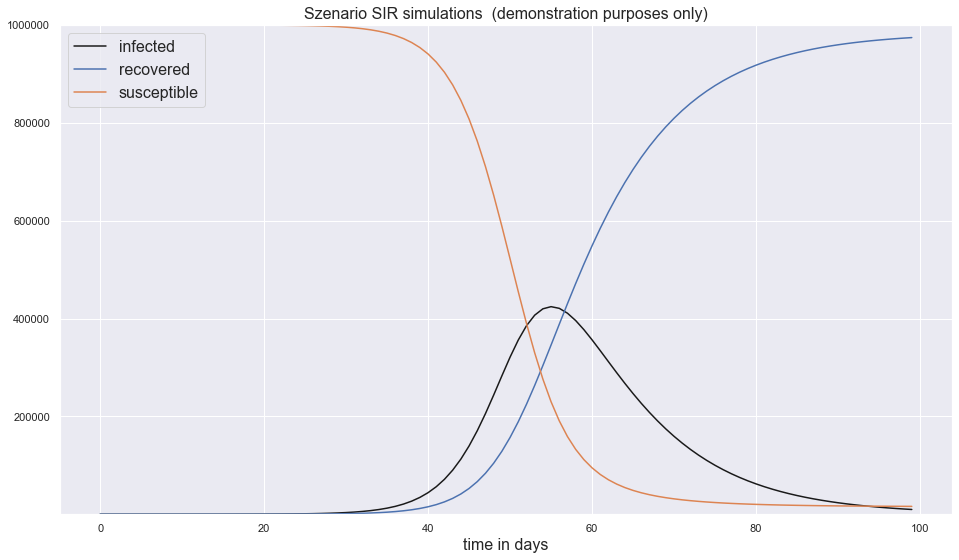

In [14]:
simulate_SIR(propagation_rates_countries['Nepal'])

### Fitting parameters of SIR model

In [15]:
df_analyse.head()

,date,country,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR
0,2020-01-22,Afghanistan,0,0.0,NaN,NaN
1,2020-01-22,Namibia,0,0.0,NaN,NaN
2,2020-01-22,Nepal,0,-0.2,NaN,NaN
3,2020-01-22,Netherlands,0,0.0,NaN,NaN
4,2020-01-22,New Zealand,0,0.0,NaN,NaN


In [16]:
beta,gamma

(0.4, 0.1)

In [17]:
N0

1000000

In [18]:
def SIR_model_t(SIR,t,beta,gamma):
        ''' Simple SIR model
            S: susceptible population
            t: time step, mandatory for integral.odeint
            I: infected people
            R: recovered people
            beta: 

            overall condition is that the sum of changes (differnces) sum up to 0
            dS+dI+dR=0
            S+I+R= N (constant size of population)

        '''

        S,I,R=SIR
        dS_dt=-beta*S*I/N0          #S*I is the 
        dI_dt=beta*S*I/N0-gamma*I
        dR_dt=gamma*I
        return dS_dt,dI_dt,dR_dt
    


def fit_SIR(country='Germany'):
    print("country",country)
    def fit_odeint(x,beta, gamma):
        '''
        helper function for the integration
        '''
        return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

    
    
    ydata = np.array(df_analyse[df_analyse["country"]==country]["confirmed"])[35:]
    t=np.arange(0,len(ydata))
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta=0.4 

    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata,maxfev=8000)
    perr = np.sqrt(np.diag(pcov))

    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
#     print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
    print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

    fitted=fit_odeint(t, *popt)
    return (t,ydata,fitted)
#   return (t,ydata,fitted,popt)
#     return list(t),list(ydata),list(fitted)

def plot_SIR(country="Germany"):
    (t,ydata,fitted,popt)=fit_SIR(country)
    plt.semilogy(t, ydata, 'o')
    plt.semilogy(t, fitted)
    plt.title("Fit of SIR model for Germany cases")
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.show()
    

In [19]:
fit_curv_SIR={}
plot_data_fitting=pd.DataFrame(columns={'t':[],
                    'target':[],
                    'prediction':[]})
for country in countries:
    (t,ydata,prediction)=fit_SIR(country)
    fit_curv_SIR[country]= plot_data_fitting.append({'t':t,
                    'target':ydata,
                    'prediction':prediction}, ignore_index=True)

country Afghanistan


/Users/anuj/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/anuj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/Users/anuj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/Users/anuj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars


standard deviation errors :  [0.00388708 0.00390818]  start infect: 1
Optimal parameters: beta = 0.2567380642029144  and gamma =  0.18005324945803083
Basic Reproduction Number R0  1.4259007542252564
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Namibia
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Nepal


/Users/anuj/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


standard deviation errors :  [0.00354188 0.00332474]  start infect: 1
Optimal parameters: beta = 0.2240322030427205  and gamma =  0.16050266988085096
Basic Reproduction Number R0  1.3958160522129048
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Netherlands
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country New Zealand
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (t

standard deviation errors :  [0.05674391 0.05383861]  start infect: 2
Optimal parameters: beta = 0.6502549290577162  and gamma =  0.5990843715991301
Basic Reproduction Number R0  1.0854146091676486
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Lesotho
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Liberia
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new 

standard deviation errors :  [0.00929633 0.00901562]  start infect: 40
Optimal parameters: beta = 0.4597469608644351  and gamma =  0.4182669409901999
Basic Reproduction Number R0  1.0991711651320948
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Timor-Leste
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Togo
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these ne

country Sao Tome and Principe
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Saudi Arabia
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Senegal
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes

standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Cabo Verde
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Cambodia
standard deviation errors :  [0.03327716 0.03297284]  start infect: 1
Optimal parameters: beta = 1.702843588346089  and gamma =  1.662256552753355
Basic Reproduction Number R0  1.0244168299565466
This ratio is derived as the expected number of new infections (these ne

standard deviation errors :  [0.00242418 0.00233329]  start infect: 1
Optimal parameters: beta = 0.23395308885890786  and gamma =  0.16529111885822612
Basic Reproduction Number R0  1.4154002373205221
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Andorra
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Angola
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new

standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Guyana
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Holy See
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a

standard deviation errors :  [0.01016911 0.00981618]  start infect: 1
Optimal parameters: beta = 0.37652744938305915  and gamma =  0.32116934755603227
Basic Reproduction Number R0  1.1723642129869474
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Diamond Princess
standard deviation errors :  [0.00098862 0.0009928 ]  start infect: 705
Optimal parameters: beta = -0.046083250254417514  and gamma =  -0.04623741015590791
Basic Reproduction Number R0  0.9966659053573592
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
country Djibouti
standard deviation errors :  [inf inf]  start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  

## Dynamic beta in SIR (infection rate)

In [20]:
def dynamic_SIR(start=50,t_initial=30,t_intro_measures=14,t_hold=21,t_relax=21,country="Nepal"):
    
    t_initial=t_initial
    t_intro_measures=t_intro_measures
    t_hold=t_hold
    t_relax=t_relax

    beta_max=0.4
    beta_min=0.11
    gamma=0.1
    
    start=int(start)
    end_index=int(t_initial+t_intro_measures+t_hold+t_relax)
    
    
#     ydata = np.array(df_analyse[df_analyse["country"]==country]["confirmed"])[-start_index:]
    ydata = np.array(df_analyse[df_analyse["country"]==country]["confirmed"])[start:start+end_index]
    
    t=np.arange(0,len(ydata))
    I0=ydata[0]
    S0=N0-I0
    R0=0


    pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                           np.linspace(beta_max,beta_min,t_intro_measures),
                           np.array(t_hold*[beta_min]),
                            np.linspace(beta_min,beta_max,t_relax),
                           ))


    SIR=np.array([S0,I0,R0])
    propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                            'infected':I0,
                                            'recovered':R0})



    for each_beta in pd_beta:

        new_delta_vec=SIR_model(SIR,each_beta,gamma)

        SIR=SIR+new_delta_vec

        propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                    'infected':SIR[1],
                                                    'recovered':SIR[2]}, ignore_index=True)
    return (t,ydata,propagation_rates)

In [21]:
countries

array(['Afghanistan', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Mozambique',
       'Morocco', 'Montenegro', 'Mongolia', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'MS Zaandam', 'Romania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Moldova', 'Monaco', 'Malawi', 'Rwanda', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Thailand', 'Timor-Leste', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda',
       'Ukraine', 'Tanzania', 'United Arab Emirates', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'United Kingdom',
       'Laos', 'Tajikistan', 'Syri

In [ ]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
print(os.getcwd())


fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data

    Goal of the project is to teach data science by applying a cross industry standard process,
    it covers the full walkthrough of: automated data gathering, data transformations,
    filtering and machine learning to approximating the doubling time, and
    (static) deployment of responsive dashboard.

    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in countries],
        value=['US', 'Germany','Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Markdown('''
        ## SIR by fitting the curve or Dynamic beta
        '''),


    dcc.Dropdown(
    id='approaches',
    options=[
        {'label': 'Fitting the curve approach ', 'value': 'fitting'},
        {'label': 'Dynamic beta', 'value': 'dynamic'},
    ],
    value='fitting',
    multi=False
    ),
    html.Div([
        html.Div([
            html.P('start:'),
            dcc.Input(
                id="start",
                type="number",
                placeholder="input start:",
                value=50,

            ),
            ],style={'width': '20%', 'display': 'inline-block'}),

        html.Div([
            html.P('t_initial:'),
            dcc.Input(
                id="t_initial",
                type="number",
                placeholder="input t_initial:",
                value=30,

            ),
            ],style={'width': '20%', 'display': 'inline-block'}),

        html.Div([
            html.P('t_intro_measures:'),
            dcc.Input(
                id="t_intro_measures",
                type="number",
                placeholder="input t_intro_measures:",
                value=14,

            ),
            ],style={'width': '20%', 'display': 'inline-block'}),

        html.Div([
            html.P('t_hold:'),
            dcc.Input(
                id="t_hold",
                type="number",
                placeholder="input t_hold:",
                value=21,

            ),
            ],style={'width': '20%', 'display': 'inline-block'}),

        html.Div([
            html.P('t_relax:'),
            dcc.Input(
                id="t_relax",
                type="number",
                placeholder="input t_relax:",
                value=21,

            ),
            ],style={'width': '20%', 'display': 'inline-block'}),
    ], style= {'display': 'block'},id="dynamic_sir_params"),
    dcc.Graph(figure=fig, id='main_window_slope')
])


@app.callback(
   Output(component_id='dynamic_sir_params', component_property='style'),
   [Input(component_id='approaches', component_property='value')])
def show_hide_element(approach):
    if approach == 'dynamic':
        return {'display': 'block'}
    if approach == 'fitting':
        return {'display': 'none'}

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('approaches', 'value'),
    Input('start', 'value'),
    Input('t_initial', 'value'),
    Input('t_intro_measures', 'value'),
    Input('t_hold', 'value'),
    Input('t_relax', 'value'),   
    ])
def update_figure(countries,approach,start,t_initial,t_intro_measures,t_hold,t_relax):
    start=int(start)
    
    my_yaxis={'type':"log",'title':'Number of infected people out of 1M population'}

    traces = []
    for country in countries:
        
        if approach=='fitting':
            df_plot=fit_curv_SIR
            df=df_plot[country]
            x_axis=df.t.item()
            y_actual=df.target.item()
            y_simulated=df.prediction.item()
            
        else:
            (t,actual,simulated)=dynamic_SIR(start,t_initial,t_intro_measures,t_hold,t_relax,country)
            x_axis=t
            y_actual=actual
            y_simulated=simulated.infected


        traces.append(dict(x=x_axis,
                                y=y_actual,
                                mode='markers+lines',
                                opacity=0.9,
                                name=country+' Actual'
                        )
                )
        traces.append(dict(x=x_axis,
                            y=y_simulated,
                            mode='markers+lines',
                            opacity=0.9,
                            name=country+' Simulated'
                    )
            )

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis=my_yaxis
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)


/Users/anuj/pythonworkspace/ds/DS_Covid19/ds_covid_19/notebooks
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
# # %load src/visualization/visualize.py
# import pandas as pd
# import numpy as np

# import dash
# dash.__version__
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output,State

# import plotly.graph_objects as go

# import os
# print(os.getcwd())


# fig = go.Figure()

# app = dash.Dash()
# app.layout = html.Div([

#     dcc.Markdown('''
#     #  Applied Data Science on COVID-19 data

#     Goal of the project is to teach data science by applying a cross industry standard process,
#     it covers the full walkthrough of: automated data gathering, data transformations,
#     filtering and machine learning to approximating the doubling time, and
#     (static) deployment of responsive dashboard.

#     '''),

#     dcc.Markdown('''
#     ## Multi-Select Country for visualization
#     '''),


#     dcc.Dropdown(
#         id='country_drop_down',
#         options=[ {'label': each,'value':each} for each in countries],
#         value=['US', 'Germany','Italy'], # which are pre-selected
#         multi=True
#     ),

#     dcc.Markdown('''
#         ## Select Timeline of confirmed COVID-19 cases or the approximated doubling time
#         '''),


#     dcc.Dropdown(
#     id='approaches',
#     options=[
#         {'label': 'Fitting the curve approach ', 'value': 'fitting'},
#         {'label': 'Dynamic beta', 'value': 'dynamic'},
#     ],
#     value='fitting',
#     multi=False
#     ),

#     dcc.Graph(figure=fig, id='main_window_slope')
# ])



# @app.callback(
#     Output('main_window_slope', 'figure'),
#     [Input('country_drop_down', 'value'),
#     Input('approaches', 'value')])
# def update_figure(countries,approach):
    
#     my_yaxis={'type':"log",'title':'Number of infected people out of 1M population'}
    
#     if approach=='fitting':
#         df_plot=fit_curv_SIR
#     else:
#         df_plot=dynamic_SIR_countries





#     traces = []
#     for country in countries:
        
#         df=df_plot[country]
#         x_axis=df.t.item()
#         y_actual=df.target.item()
#         y_predicted=df.prediction.item()


#         traces.append(dict(x=x_axis,
#                                 y=y_actual,
#                                 mode='markers+lines',
#                                 opacity=0.9,
#                                 name=country+' Actual'
#                         )
#                 )
#         traces.append(dict(x=x_axis,
#                             y=y_predicted,
#                             mode='markers+lines',
#                             opacity=0.9,
#                             name=country+' Predicted'
#                     )
#             )

#     return {
#             'data': traces,
#             'layout': dict (
#                 width=1280,
#                 height=720,

#                 xaxis={'title':'Timeline',
#                         'tickangle':-45,
#                         'nticks':20,
#                         'tickfont':dict(size=14,color="#7f7f7f"),
#                       },

#                 yaxis=my_yaxis
#         )
#     }

# if __name__ == '__main__':

#     app.run_server(debug=True, use_reloader=False)


## FULL DATASET